In [67]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from sklearn.manifold        import TSNE
from sklearn.preprocessing   import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster         import KMeans, AgglomerativeClustering

%matplotlib inline
plt.style.use('ggplot')

np.random.seed(47)

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
df  = pd.read_csv(url)

df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
df.genres.str.get_dummies()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
genres = df.genres.str.get_dummies()

df_ohe = pd.concat([df.drop('genres', axis = 1), genres], axis = 1)
df_ohe

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


verificando características que mais influenciam nos filmes, através de scaling

In [5]:
scaler = StandardScaler()

In [6]:
scaled_genres = scaler.fit_transform(genres)
scaled_genres

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [7]:
mdl_kmeans = KMeans(n_clusters = 3)
mdl_kmeans.fit(scaled_genres)

print(f'Grupos {mdl_kmeans.labels_}')

Grupos [1 1 2 ... 0 1 2]


In [8]:
print(f'{mdl_kmeans.cluster_centers_}')

[[-0.05917995 -0.16328696 -0.27747325 -0.23613592 -0.23520844 -0.33592329
   0.18895473 -0.19774964  0.98806411 -0.18481802  0.11083764 -0.21810928
  -0.11577646 -0.05324701  0.11105355  0.13206882 -0.22767954  0.08765388
   0.18048138 -0.03030347]
 [-0.05917995  0.82736604  1.54802216  1.18368626  1.08384169 -0.18253418
  -0.2565739  -0.21126395 -0.60645354  0.94445953 -0.08118356 -0.24586486
   0.58804965  0.12775489 -0.09888019 -0.29068776  0.7852116  -0.06984587
  -0.14207365 -0.05238518]
 [ 0.09237921 -0.14798691 -0.3092548  -0.20880384 -0.16926993  0.46199251
  -0.11376982  0.31418086 -0.8939027  -0.17075262 -0.09492563  0.35175362
  -0.10550431  0.00950862 -0.08797805 -0.03423244 -0.05651459 -0.07277514
  -0.15055358  0.0562835 ]]


In [9]:
clusters = pd.DataFrame(mdl_kmeans.cluster_centers_, columns = genres.columns)

clusters.T.reset_index()

,index,0,1,2
0,(no genres listed),-0.059180,-0.059180,0.092379
1,Action,-0.163287,0.827366,-0.147987
2,Adventure,-0.277473,1.548022,-0.309255
3,Animation,-0.236136,1.183686,-0.208804
4,Children,-0.235208,1.083842,-0.169270
5,Comedy,-0.335923,-0.182534,0.461993
6,Crime,0.188955,-0.256574,-0.113770
7,Documentary,-0.197750,-0.211264,0.314181
8,Drama,0.988064,-0.606454,-0.893903
9,Fantasy,-0.184818,0.944460,-0.170753


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A1A148D08>,
      dtype=object)

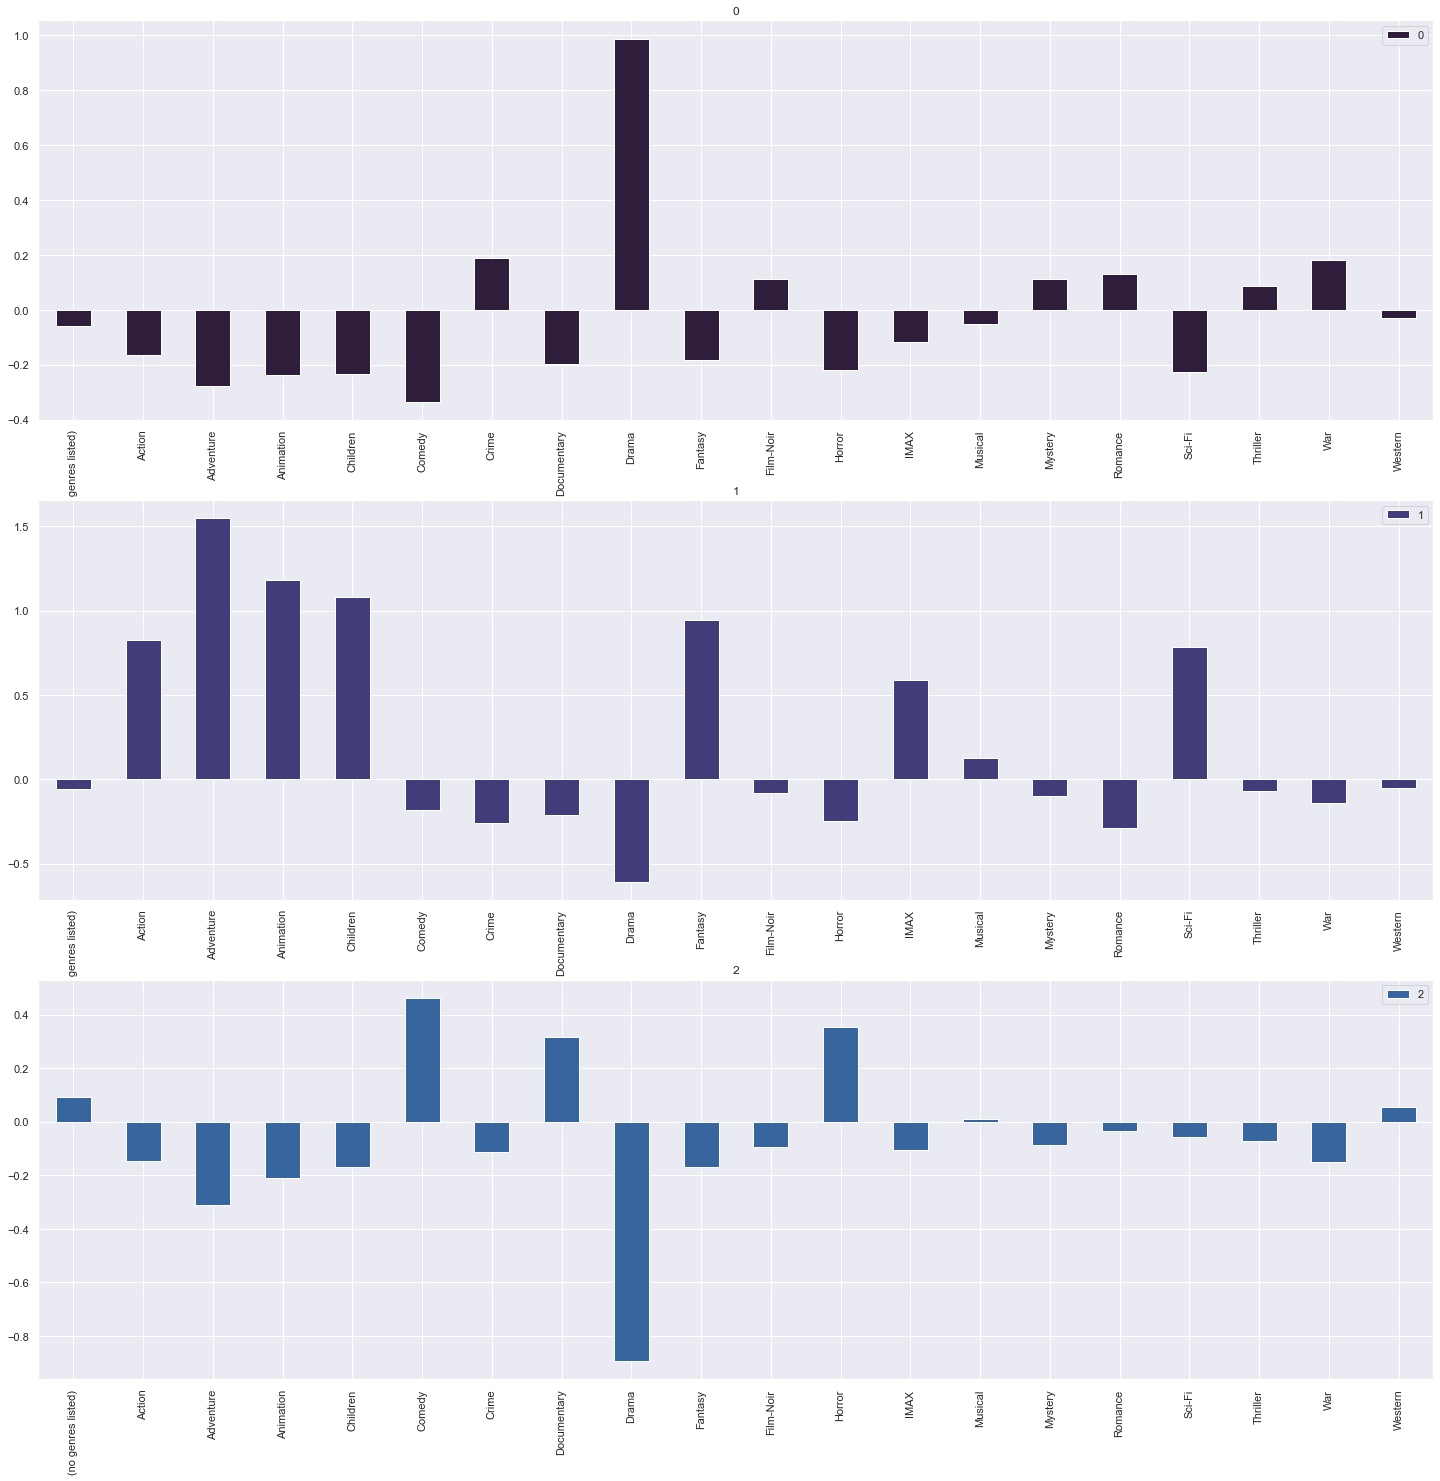

In [10]:
sns.set(palette = 'mako')
clusters.T.plot.bar(subplots = True,
                 figsize = (25, 25),
                 sharex = False)

In [11]:
group = 0
filt = mdl_kmeans.labels_ == group

df[filt]

,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,6,Heat (1995),Action|Crime|Thriller
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
...,...,...,...
9727,190213,John From (2015),Drama
9728,190215,Liquid Truth (2017),Drama
9733,193567,anohana: The Flower We Saw That Day - The Movi...,Animation|Drama
9734,193571,Silver Spoon (2014),Comedy|Drama


In [12]:
tsne = TSNE()

reduced_genres = tsne.fit_transform(scaled_genres)

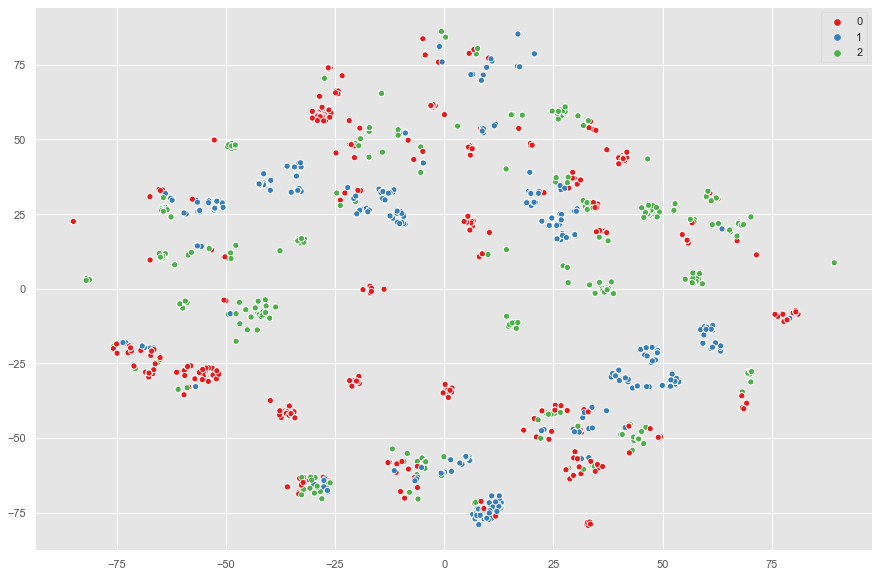

In [13]:
sns.set(rc = {'figure.figsize':(15, 10)})
plt.style.use('ggplot')
sns.scatterplot(x = reduced_genres[:, 0], y = reduced_genres[:, 1],
               hue = mdl_kmeans.labels_, palette = 'Set1')


In [15]:
mdl_kmeans_20 = KMeans(n_clusters = 20)
mdl_kmeans_20.fit(scaled_genres)

print(f'Grupos {mdl_kmeans.labels_}')

Grupos [1 1 2 ... 0 1 2]


In [17]:
clusters_20 = pd.DataFrame(mdl_kmeans_20.cluster_centers_,
                           columns = genres.columns)

clusters_20.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.270889,-0.260077,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.900253,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.046941,-0.202020,-0.132065
1,-0.059180,1.121311,0.028372,-0.244506,-0.270451,-0.523834,1.733100,-0.217489,0.098369,-0.269471,-0.094926,-0.305468,-0.128397,-0.188419,-0.249986,-0.298721,-0.283024,2.035586,-0.202020,-0.132065
2,16.897616,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
3,-0.059180,-0.462136,-0.364480,-0.238850,-0.260913,-0.604451,-0.338046,4.597924,-0.808396,-0.285947,-0.094926,-0.318057,-0.128397,-0.188419,-0.229553,-0.429644,-0.334435,-0.479111,-0.078173,-0.132065
4,-0.059180,-0.191556,0.911226,-0.258679,3.697524,0.392944,-0.346005,-0.217489,-0.465254,0.860935,-0.094926,-0.313193,-0.128397,-0.188419,-0.116751,-0.307118,0.009485,-0.475417,-0.202020,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A252E6D88>,
      dtype=object)

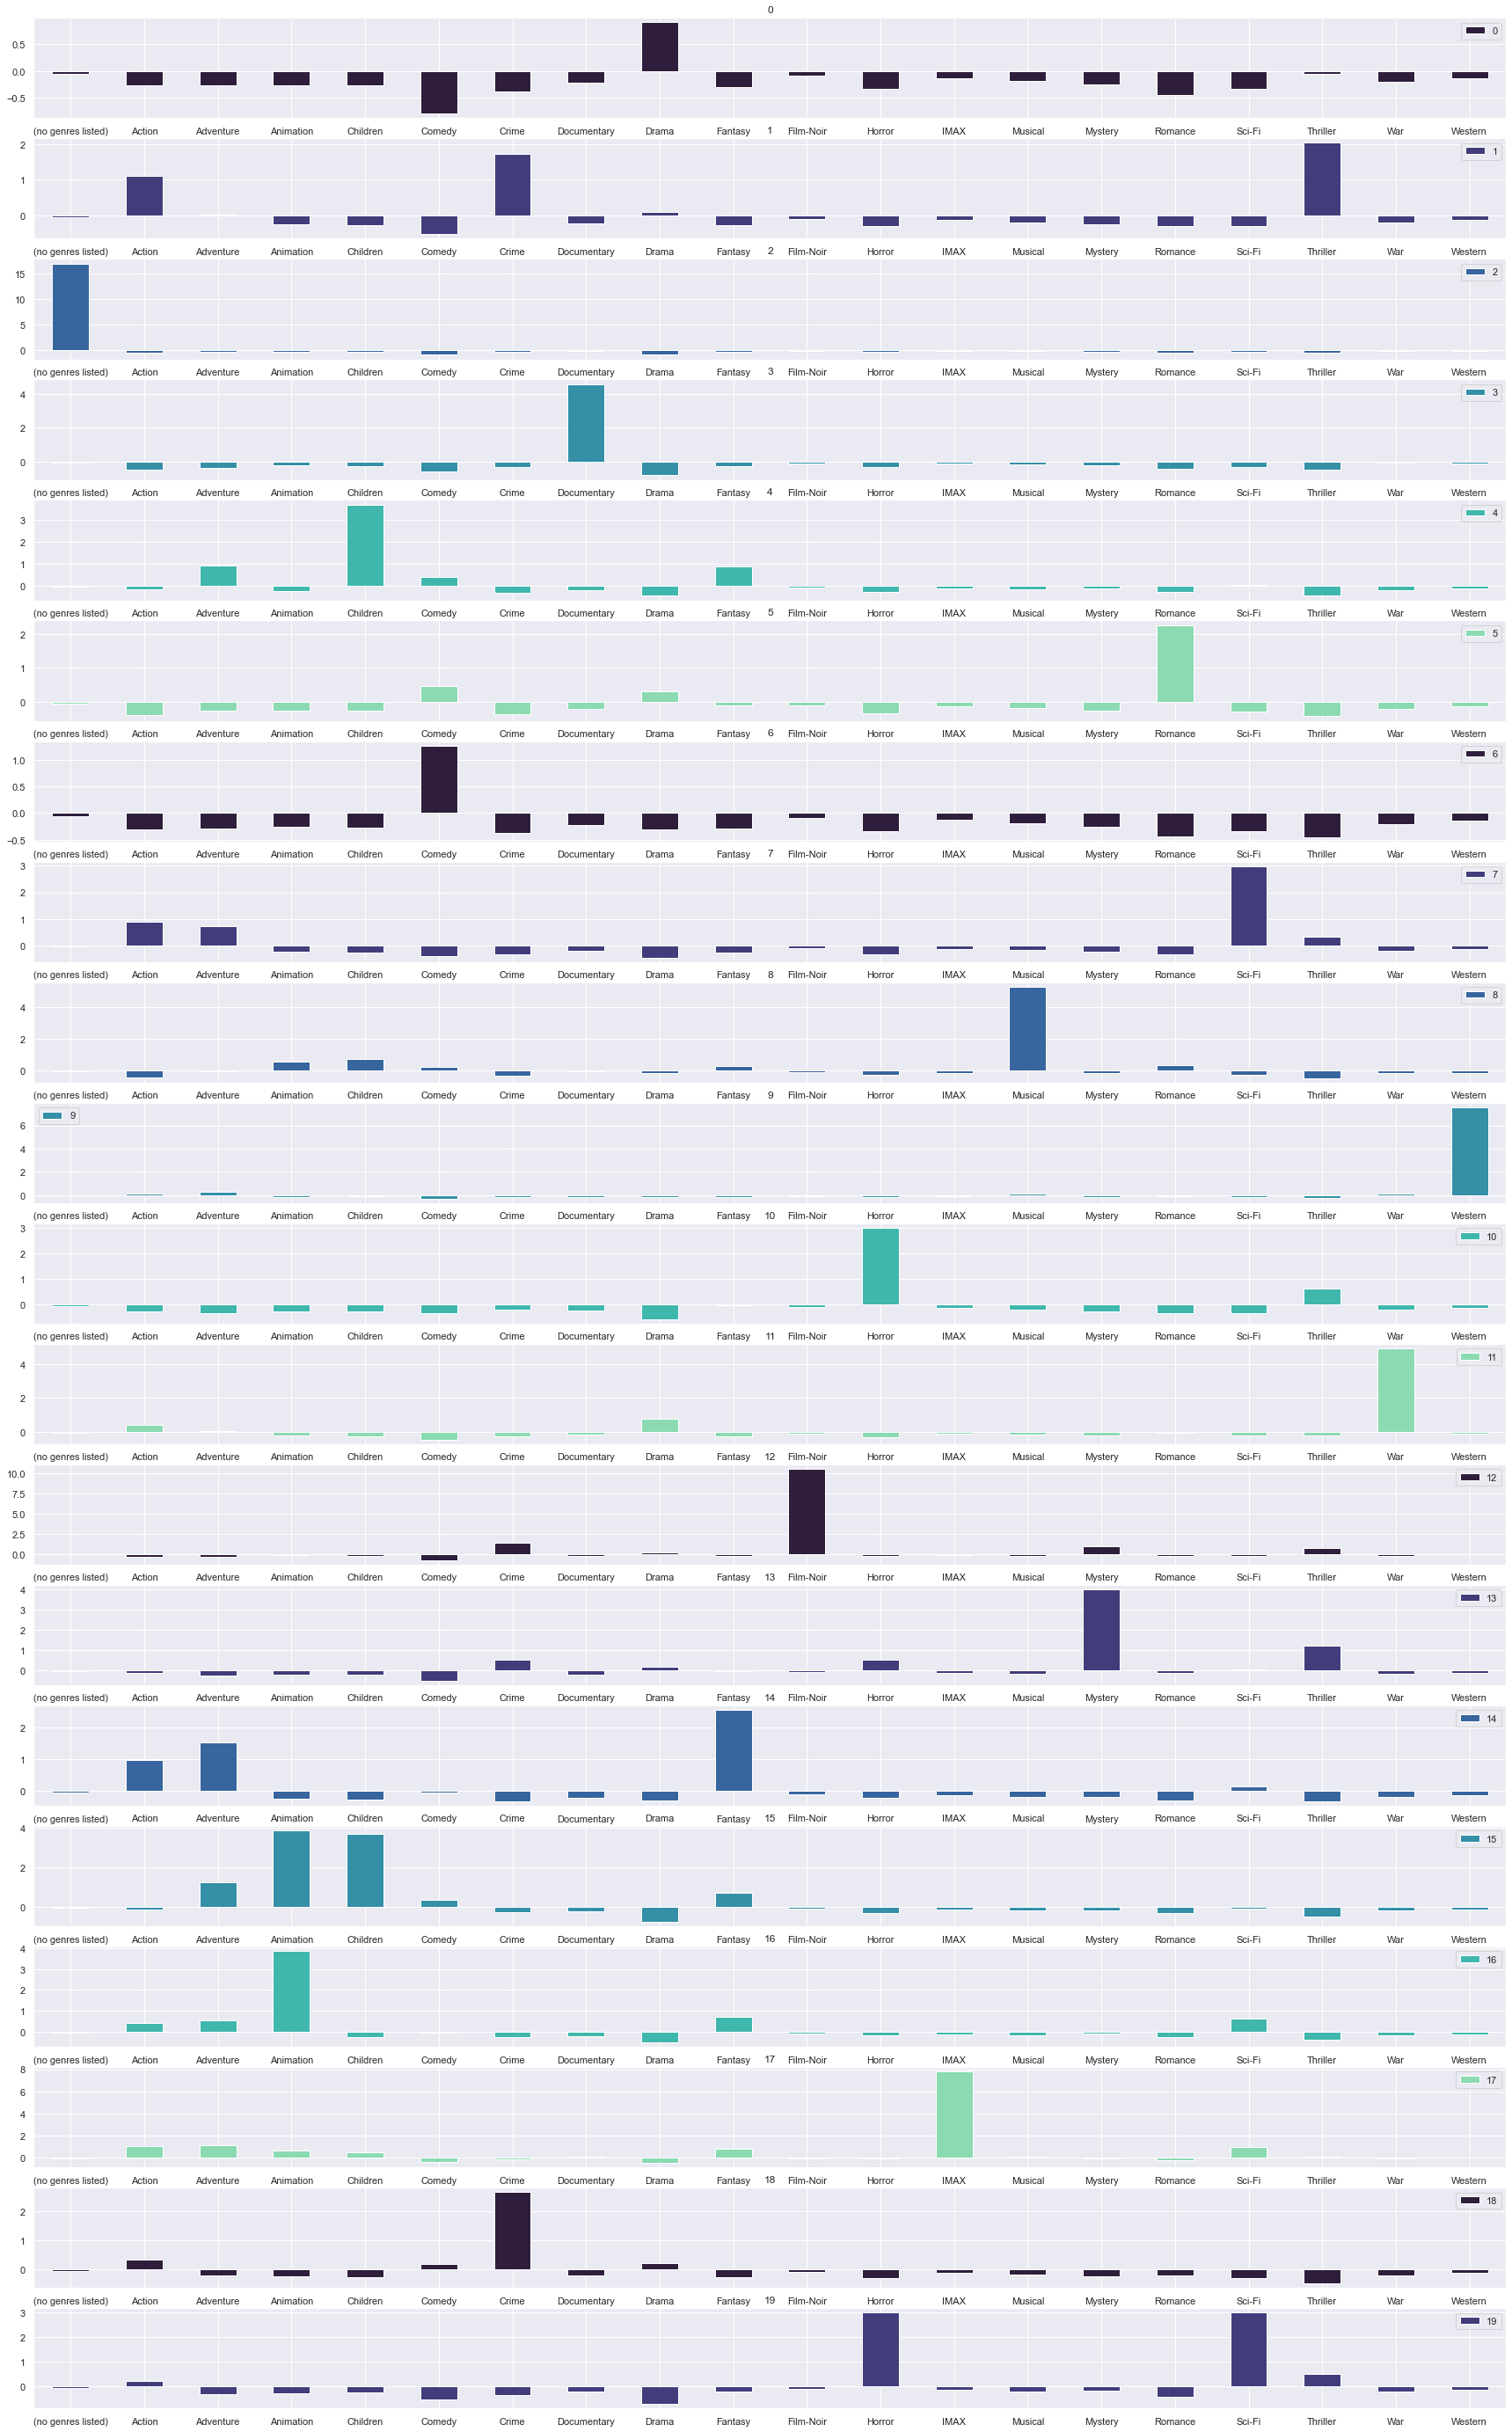

In [21]:
sns.set(palette = 'mako')
clusters_20.T.plot.bar(subplots = True,
                 figsize = (30, 50),
                 sharex = False, rot = 0)

In [27]:
group = 4
filt = mdl_kmeans_20.labels_ == group

df[filt].head(10)

,movieId,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy
7,8,Tom and Huck (1995),Adventure|Children
26,27,Now and Then (1995),Children|Drama
32,34,Babe (1995),Children|Drama
34,38,It Takes Two (1995),Children|Comedy
49,54,"Big Green, The (1995)",Children|Comedy
53,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy
72,80,"White Balloon, The (Badkonake sefid) (1995)",Children|Drama
78,87,Dunston Checks In (1996),Children|Comedy
109,126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy


In [28]:
def kmeans(clusters, genres):
    mdl = KMeans(n_clusters = clusters)
    mdl.fit(genres)
    
    return [clusters, mdl.inertia_]

In [36]:
kmeans(20, scaled_genres)

[20, 54925.537827855325]

In [37]:
kmeans(3, scaled_genres)

[3, 166185.4543986415]

In [38]:
result = [kmeans(clusters, scaled_genres) for clusters in range(1, 41)]
result

[[1, 194839.9999999991],
 [2, 179483.9402940371],
 [3, 168062.4340768336],
 [4, 157702.00152083227],
 [5, 146669.65107325377],
 [6, 138233.05610796562],
 [7, 129123.78009427231],
 [8, 118930.21891383502],
 [9, 111222.76890416951],
 [10, 102993.22263600405],
 [11, 94426.77464360156],
 [12, 86899.8318477083],
 [13, 78684.4677221793],
 [14, 76317.80534660269],
 [15, 69180.2709835835],
 [16, 63645.29542652854],
 [17, 60556.79381535568],
 [18, 60549.71264224585],
 [19, 57687.00175905832],
 [20, 55375.50378426235],
 [21, 53367.353904858275],
 [22, 51438.689953868095],
 [23, 49986.27042791956],
 [24, 49197.11181428194],
 [25, 48850.237031039775],
 [26, 47051.291315939896],
 [27, 46033.614956562305],
 [28, 44419.78012282976],
 [29, 43564.195054374235],
 [30, 43424.605423454435],
 [31, 41692.03329407467],
 [32, 41040.80021914363],
 [33, 40331.8323154339],
 [34, 39089.642763178825],
 [35, 39142.729108843945],
 [36, 37648.00912671166],
 [37, 37696.561524046934],
 [38, 36286.993283850905],
 [39, 3

In [39]:
clusters_df = pd.DataFrame(result,
            columns = ['clusters', 'inertia'])

clusters_df.head()

,clusters,inertia
0,1,194840.000000
1,2,179483.940294
2,3,168062.434077
3,4,157702.001521
4,5,146669.651073


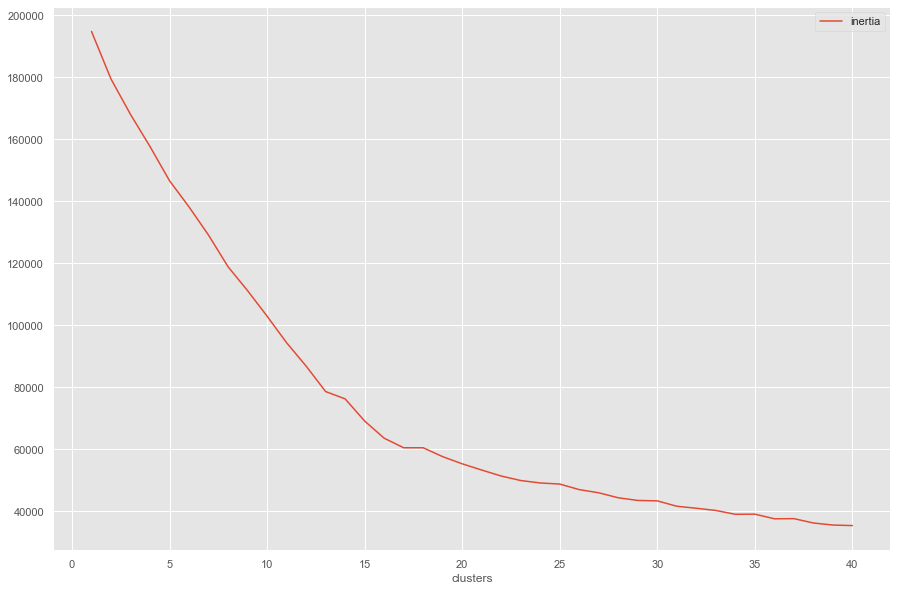

In [42]:
plt.style.use('ggplot')
clusters_df.plot(x = 'clusters', y = 'inertia')

In [44]:
kmeans_elbow = KMeans(17)
kmeans_elbow.fit(scaled_genres)


KMeans(n_clusters=17)

In [47]:
clusters_elbow = pd.DataFrame(kmeans_elbow.cluster_centers_, columns = genres.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A348E9FC8>,
      dtype=object)

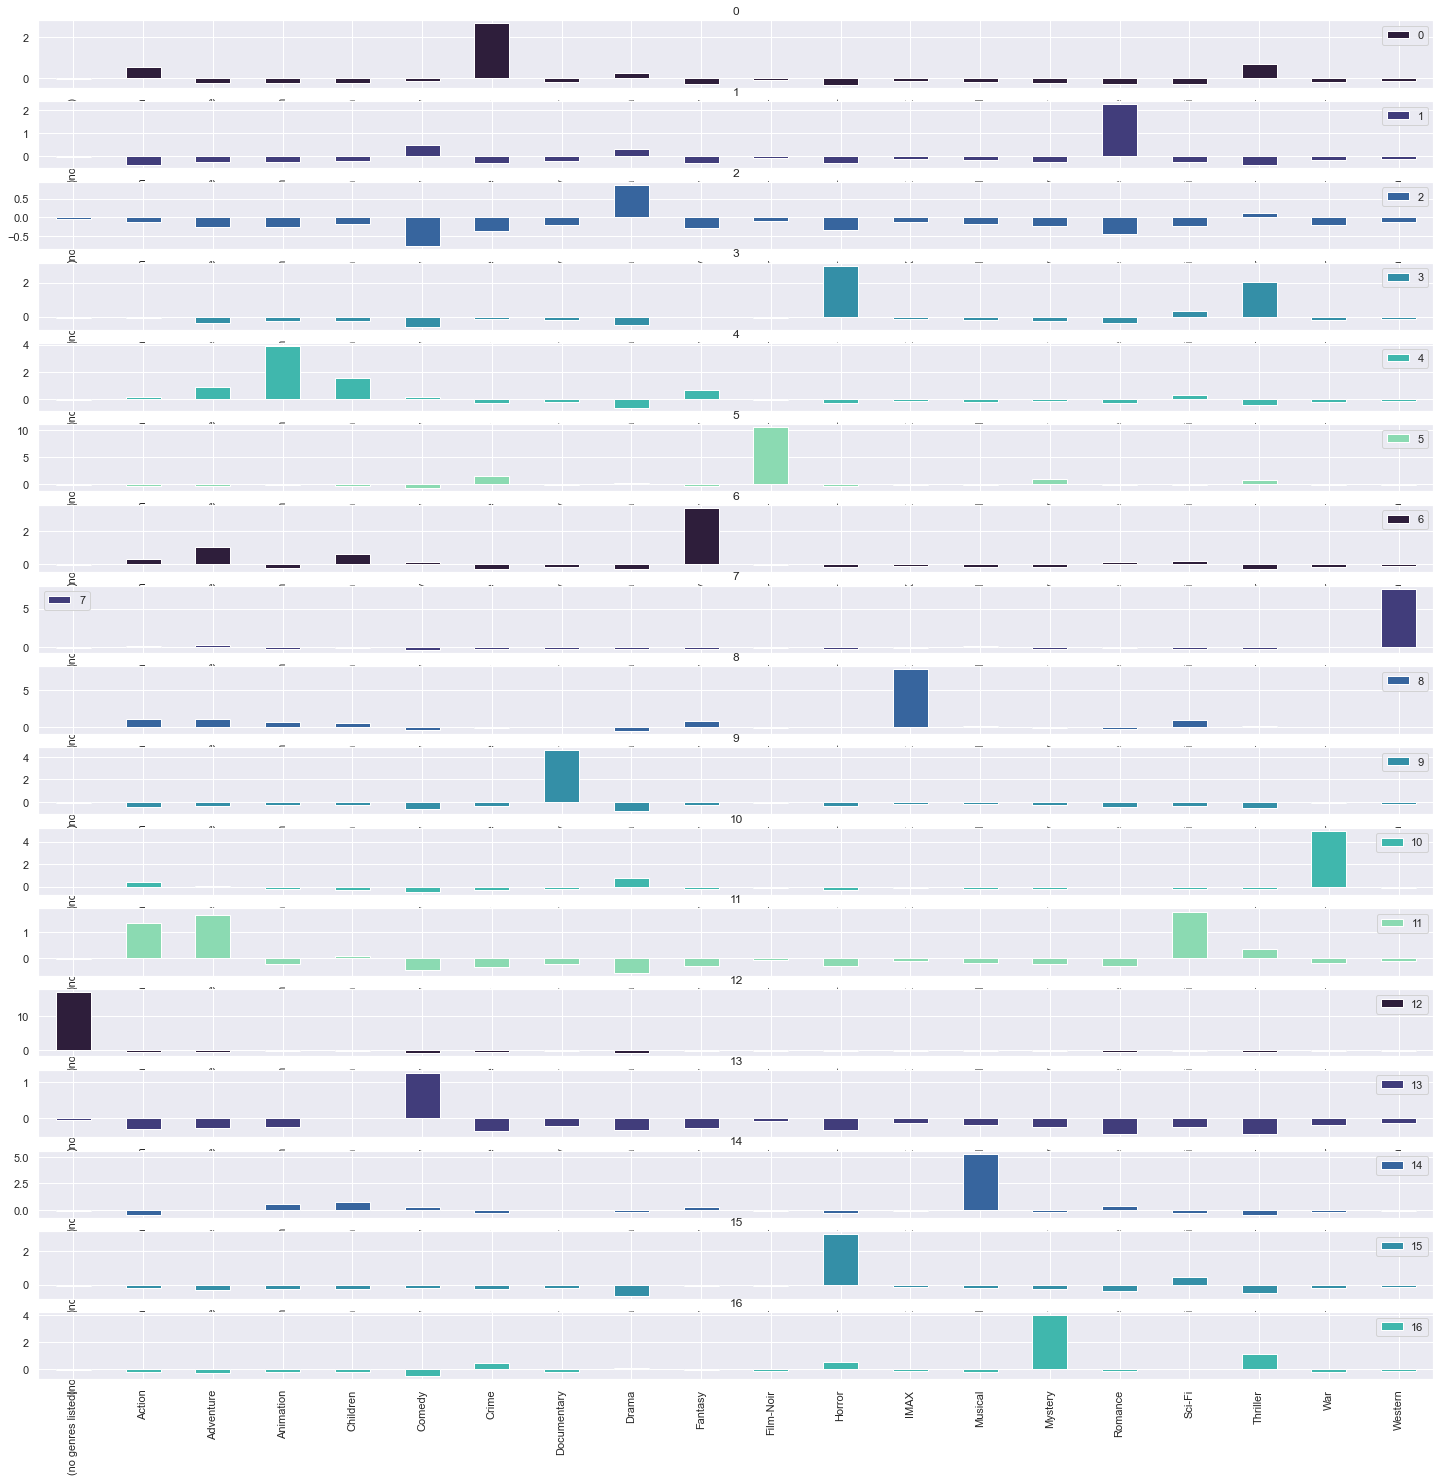

In [49]:
sns.set(palette = 'mako')
clusters_elbow.T.plot.bar(subplots = True,
                 figsize = (25, 25),
                 sharex = False)

In [50]:
group = 0
filt = kmeans_elbow.labels_ == group

df[filt]

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
15,16,Casino (1995),Crime|Drama
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
20,21,Get Shorty (1995),Comedy|Crime|Thriller
22,23,Assassins (1995),Action|Crime|Thriller
...,...,...,...
9696,184931,Death Wish (2018),Action|Crime|Drama|Thriller
9702,185135,Sherlock - A Study in Pink (2010),Crime
9714,188675,Dogman (2018),Crime|Drama
9721,189381,SuperFly (2018),Action|Crime|Thriller


In [52]:
mdl_agglomerative = AgglomerativeClustering(n_clusters = 17)
clusters_agglomerative = mdl_agglomerative.fit_predict(scaled_genres)

In [53]:
clusters_agglomerative

array([ 5, 14, 13, ...,  2,  5,  3], dtype=int64)

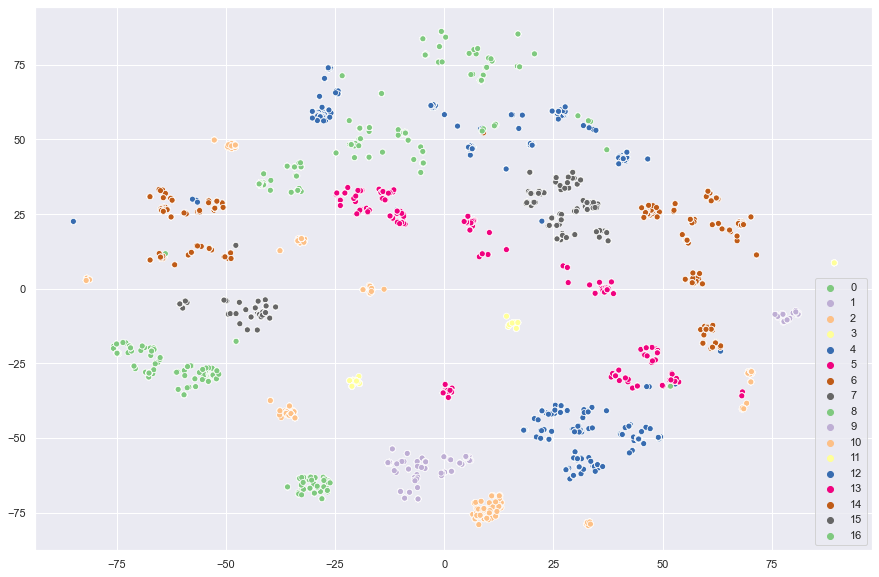

In [71]:
sns.set(rc = {'figure.figsize':(15, 10)})
sns.set(style = 'darkgrid')
sns.scatterplot(x = reduced_genres[:, 0], y = reduced_genres[:, 1],
               hue = clusters_agglomerative, palette = 'Accent')


In [76]:
distance_matrix = linkage(clusters_elbow)
distance_matrix

array([[ 2.        , 13.        ,  2.44119054,  2.        ],
       [ 3.        , 15.        ,  2.57303525,  2.        ],
       [ 1.        , 17.        ,  2.89673701,  3.        ],
       [ 0.        , 19.        ,  3.29189221,  4.        ],
       [11.        , 20.        ,  3.50120543,  5.        ],
       [18.        , 21.        ,  3.74052476,  7.        ],
       [ 6.        , 22.        ,  4.21865515,  8.        ],
       [16.        , 23.        ,  4.63577276,  9.        ],
       [ 4.        , 24.        ,  4.85286713, 10.        ],
       [ 9.        , 25.        ,  5.14774255, 11.        ],
       [10.        , 26.        ,  5.22410771, 12.        ],
       [14.        , 27.        ,  5.78549345, 13.        ],
       [ 7.        , 28.        ,  7.84600154, 14.        ],
       [ 8.        , 29.        ,  8.13659115, 15.        ],
       [ 5.        , 30.        , 10.8163209 , 16.        ],
       [12.        , 31.        , 17.06294472, 17.        ]])

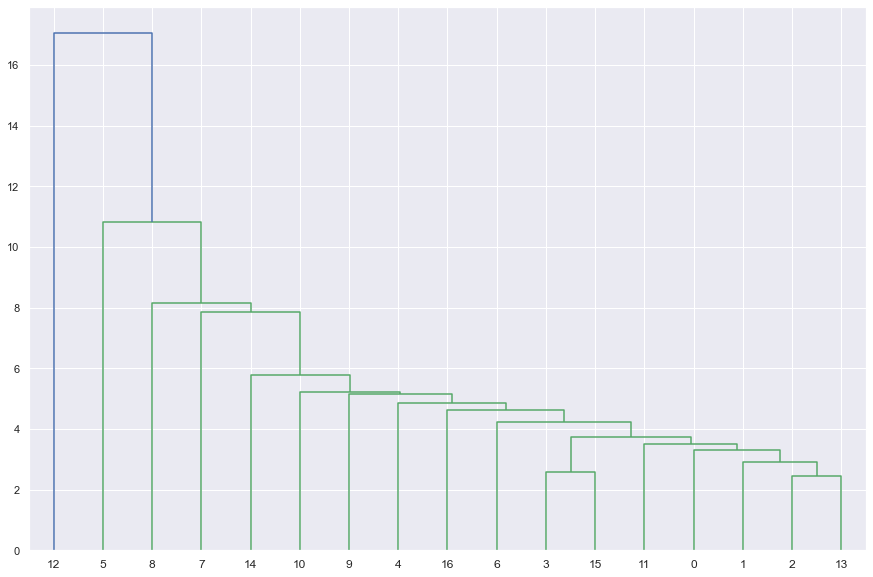

In [79]:
dendro = dendrogram(distance_matrix)